<a href="https://colab.research.google.com/github/nextye/AnsanPC/blob/master/LineSeperation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

퍼셉트론이나 뉴런의 몸 안에서 일어나는 일이 놀랍도록 간단합니다. 입력 신호에는 가중치 값이 곱해집니다. 즉, 각 입력에는 해당 가중치가 있습니다. 이런 식으로 모든 xi마다 입력을 개별적으로 조정할 수 있습니다. 모든 입력을 입력 벡터로, 해당 가중치를 가중치 벡터로 볼 수 있습니다.

신호가 들어 오면이 특정 입력에 할당 된 가중치를 곱합니다. 즉, 뉴런에 세 개의 입력이 있으면 개별적으로 조정할 수있는 세 개의 가중치가 있습니다. 가중치는 일반적으로 학습 단계에서 조정됩니다.
그 후 수정 된 입력 신호가 합산됩니다. 이 합계에 소위 바이어스 'b'를 추가하는 것도 가능합니다. 바이어스는 학습 단계에서 조정할 수있는 값입니다.

마지막으로 실제 출력을 결정해야합니다. 이를 위해 활성화 또는 단계 함수 Φ가 입력 값의 가중치 합계에 적용됩니다.

Confusion Matrix

활성화 함수의 가장 간단한 형태는 이진 함수입니다. 합산 결과가 일부 임계 값보다 큰 경우 Φ의 결과는 1이되고 그렇지 않으면 0이됩니다.

From Dividing Lines to Neural Networks:


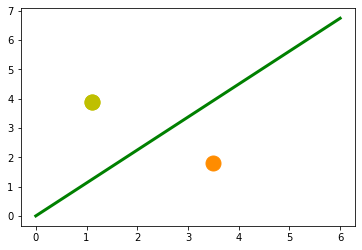

In [1]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig, ax = plt.subplots()

ax.plot(3.5, 1.8, "or", 
        color="darkorange", 
        markersize=15)
ax.plot(1.1, 3.9, "oy", 
        markersize=15)

point_on_line = (4, 4.5)
ax.plot(1.1, 3.9, "oy", markersize=15)
# calculate gradient:
m = point_on_line[1] / point_on_line[0]  
ax.plot(X, m * X, "g-", linewidth=3)
plt.show()

In [2]:
lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4

# check if orange is below the line,
# positive value is expected:
print(orange[0] * m - orange[1])

# check if lemon is above the line,
# negative value is expected:
print(lemon[0] * m - lemon[1])

2.1375
-2.6624999999999996



다음 Python 프로그램은 여러 줄을 계산하고 렌더링합니다. 모든 원점, 즉 점 (0, 0)을 통과합니다.

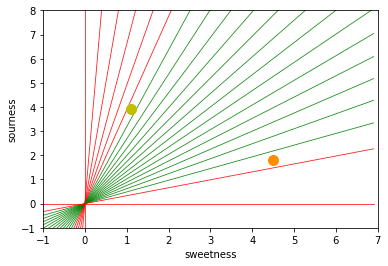

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

def create_distance_function(a, b, c):
    """ 0 = ax + by + c """
    def distance(x, y):
        """ 
        returns tuple (d, pos)
        d is the distance
        If pos == -1 point is below the line, 
        0 on the line and +1 if above the line
        """
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom<0 and b<0) or (nom>0 and b>0):
            pos = -1
        else:
            pos = 1
        return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)
    return distance
    
orange = (4.5, 1.8)
lemon = (1.1, 3.9)
fruits_coords = [orange, lemon]

fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)

step = 0.05
for x in np.arange(0, 1+step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    Y = slope * X
    results = []
    for point in fruits_coords:
        results.append(dist4line1(*point))
    if (results[0][1] != results[1][1]):
        ax.plot(X, Y, "g-", linewidth=0.8, alpha=0.9)
    else:
        ax.plot(X, Y, "r-", linewidth=0.8, alpha=0.9)
 
size = 10
for (index, (x, y)) in enumerate(fruits_coords):
    if index== 0:
        ax.plot(x, y, "o", 
                color="darkorange", 
                markersize=size)
    else:
        ax.plot(x, y, "oy", 
                markersize=size)


plt.show()